### Logistics回归原理

为了实现Logistics分类，我们可以在每个特征上都乘以一个回归系数，然后将所有的结果值相加，将这个总和代入**Sigmoid函数**中，进而得到一个范围在0-1之间的数值，大于0.5的为1类，小于0.5的为0类。所以Logistics分类其实也是一个概率估计。

Sigmoid函数：$$\sigma(z)=\frac{1}{1+e^{-z}}$$  画一下函数图像可以发现这类似单位跃迁函数，即随着x的增大 对应值逼近1 而随着x减小 对应逼近0

$$z=w_0x_0+w_1x_1+...+w_nx_n$$
其中z为Sigmoid函数的输入值，而x为特征值，也就是分类器的输入数据，而w则为特征对应的参数。
也就是说，对于已知的一组数据，我们的目标就是确定向量w的最佳参数，使分类器更加准确。在此有梯度上升法、随机梯度上升法等多种方法来确定w。


梯度上升法的思想：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。
梯度算法的公式为$$w:=w+\alpha\nabla_wf(w)$$
其中$:=$表示赋值，梯度算子总是指向函数值增长最快的方向。而移动量的大小则为步长$\alpha$

关于梯度下降算法其实类似梯度上升算法。梯度上升用于求函数的最大值，而梯度下降用于求函数的最小值

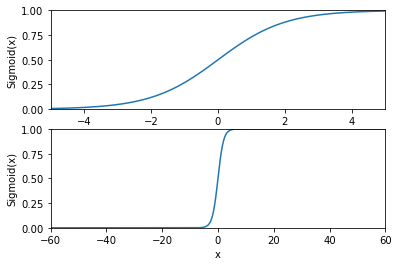

In [21]:
#Sigmoid函数
import sys
from pylab import *

t = arange(-60.0, 60.3, 0.1)
s = 1/(1 + exp(-t))
ax = subplot(211)
ax.plot(t,s)
ax.axis([-5,5,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
ax = subplot(212)
ax.plot(t,s)
ax.axis([-60,60,0,1])
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
show()

In [6]:
#梯度上升算法
#伪代码：
#每个回归系数初始化为1
#重复R次：
#    计算整个数据集的梯度
#    使用alpha*gradient更新回归系数的向量
#    返回回归系数

from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')#其中存储三行信息 X1、X2以及类别标签
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #转换为NumPy矩阵的数据类型
    labelMat = mat(classLabels).transpose() #因为要进行矩阵计算 所以将其转置为列向量
    m,n = shape(dataMatrix)
    alpha = 0.001    #步长
    maxCycles = 500   #迭代次数
    weights = ones((n,1))
    for k in range(maxCycles):              
        h = sigmoid(dataMatrix*weights)     #h不是一个数 而是一个列向量
        error = (labelMat - h)              
        weights = weights + alpha * dataMatrix.transpose()* error 
    return weights

dataArr,labelMat=loadDataSet()
weights=gradAscent(dataArr,labelMat)
weights

**通过上述代码我们可以确定最优参数w，然后就可以进行分类**

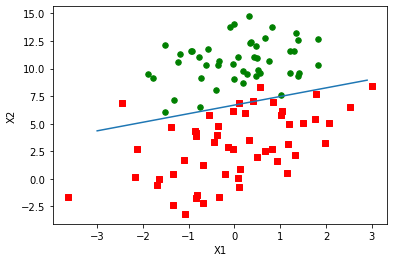

In [8]:
import matplotlib.pyplot as plt
def plotBestFit(weights):
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]  #最佳拟合直线
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

plotBestFit(weights.getA())

我们发现以上方法的分类结果不错，但是却需要极大的计算(300次乘法) 如果样本数量较大，那计算复杂度就太高了 于是又有改进方法：**随机梯度上升法** 它是通过一次仅用一个样本点来更新回归系数。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个“在线学习”算法。与“在线学习”相对应，一次处理所以数据被称作是“批处理”

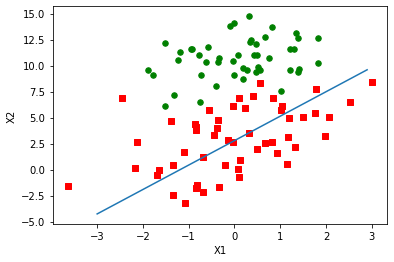

In [26]:
#随机梯度上升算法
#伪代码：
#每个回归系数初始化为1
#对数据集中每个样本
#    计算该样本的梯度
#    使用alpha*gradient更新回归系数的向量
#返回回归系数

def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))#h和error为数值 这是与梯度上升算法的区别之一 其二是随机梯度上升算法没有矩阵的转换过程
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

dataArr,labelMat=loadDataSet()
weights=stocGradAscent0(array(dataArr),labelMat)
plotBestFit(weights)

可以发现拟合直线的效果虽然不错但是不及先前的效果。但是直接比较并不合适，因为原先的结果是在整个数据集上进行了500次迭代得到的。判断算法的优劣的可靠方法是看它是否收敛，即参数是否达到了稳定值，是否还会不断地变化。对其进行200次迭代后发现X2只经过50次迭代就达到了稳定值，但X1和X0则需要更多次。我们期望算法可以避免来回波动，从而收敛到某个值。另外收敛速度也要足够快。于是我们对其进行改进。

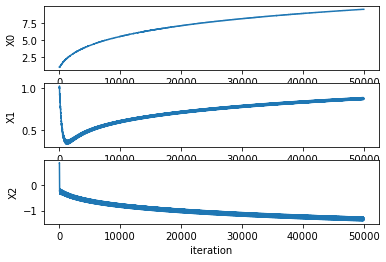

In [33]:
#关于算法迭代
def TstocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   
    weightsHistory=zeros((500*m,n))
    for j in range(500):
        for i in range(m):
            h = sigmoid(sum(dataMatrix[i]*weights))
            error = classLabels[i] - h
            weights = weights + alpha * error * dataMatrix[i]
            weightsHistory[j*m + i,:] = weights
    return weightsHistory

dataMat,labelMat=loadDataSet()
dataArr = array(dataMat)
myHist = TstocGradAscent0(dataArr,labelMat)

n = shape(dataArr)[0]
xcord1 = []; ycord1 = []
xcord2 = []; ycord2 = []

markers =[]
colors =[]

fig = plt.figure()
ax = fig.add_subplot(311)
type1 = ax.plot(myHist[:,0])
plt.ylabel('X0')
ax = fig.add_subplot(312)
type1 = ax.plot(myHist[:,1])
plt.ylabel('X1')
ax = fig.add_subplot(313)
type1 = ax.plot(myHist[:,2])
plt.xlabel('iteration')
plt.ylabel('X2')
plt.show()

In [ ]:
import Ipynb_importer
from numpy import *
from LogisticsRegression import loadDataSet,plotBestFit,sigmoid

#改进的随机梯度上升算法
def stocGradAscent1(dataMatrix, classLabels, numIter =150):#numIter为迭代次数 默认为150
    m,n = shape(dataMatrix)
    weights = ones(n)   
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #alpha在每次迭代时进行调整 这可以减少低频和高频波动 j是迭代次数 i是样本点下标  alpha会随迭代次数不断减小，但永远不会为0，因为存在常数项
            randIndex = int(random.uniform(0,len(dataIndex)))#通过算计选择样本点来更新回归系数    减少周期性的波动
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

dataArr,labelMat=loadDataSet()
weights=stocGradAscent1(array(dataArr),labelMat)#我们发现通过更少的计算次数，但是可以达到与梯度上升算法差不多的效果
plotBestFit(weights)
weights=stocGradAscent1(array(dataArr),labelMat,numIter=500)#修改迭代次数
plotBestFit(weights)

### 从疝气病症预测病马的死亡率

1. 收集数据：给定数据文件
2. 准备数据：用Python解析文本文件并填充缺失值
3. 分析数据：可视化并观察数据
4. 训练算法：使用优化算法，找到最佳系数
5. 测试算法：为了量化回归的效果，需要观察错误率。根据错误率决定是否回退到训练阶段，通过改变迭代的次数和步长等参数来得到更好的回归系数。
6. 使用算法：实现一个简单的命令行程序来收集马的症状并输出预测结果。

关于预处理
* 由于存在数据缺失，我们对其进行预处理，这里将缺失值替换为0 因为在这次的数据中，用0替代既可以保留现有数据，也不需要对优化算法进行修改。
* 对于标签缺失的数据 进行丢弃

预处理后得到两个txt文件 位于根目录下

In [50]:

#输入回归系数与特征向量
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    #读取测试集与训练集 最后一列标签为类别标签 表示马的三种状态：“仍存活”、“已经死亡”、“已经安乐死”。为了方便 将后两个标签合为“未能存活”的标签
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print ("the error rate of this test is: %f" % errorRate)
    return errorRate

#调用colicTest10次并求结果的平均值
def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f"%(numTests, errorSum/float(numTests)))

multiTest()

the error rate of this test is: 0.388060
the error rate of this test is: 0.328358
the error rate of this test is: 0.253731
the error rate of this test is: 0.358209
the error rate of this test is: 0.313433
the error rate of this test is: 0.253731
the error rate of this test is: 0.343284
the error rate of this test is: 0.328358
the error rate of this test is: 0.283582
the error rate of this test is: 0.417910
after 10 iterations the average error rate is: 0.326866


### 总结
Logistic回归的目的就是寻找一个非线性函数Sigmoid的最佳拟合参数，求解过程可以由最优化算法来完成。常见最优化算法有梯度上升上升算法，而其又可以简化为随机梯度上升算法。

Logistic回归的优缺点：
* 优点：计算代价不高，易于理解和实现
* 缺点：容易欠拟合，分类精度可能不高
* 适用数据类型：数值型和标称型数据

关于数据缺失的一些做法：
* 使用可用特征的均值来填补缺失值
* 使用特殊值来填补缺失值，如-1
* 忽略有缺失值的样本
* 使用相似样本的均值填补缺失值
* 使用另外的机器学习算法预测缺失值